# Telco Customer Churn Analysis

This project analyzes the **Telco Customer Churn dataset** (from Kaggle).  
Goal: Identify patterns behind customer churn and build a predictive model.  

**Tools:** Python, Pandas, Matplotlib/Seaborn, Scikit-learn 

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score


In [23]:
df.head(5)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,churn_label
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,Yes


In [12]:
print(df.shape) # numbers of rows and coloumns

(7043, 21)


# Data Cleaning & Preprocessing: 
Objective: Prepare the dataset for machine learning by handling data types, standardizing column names, and managing missing values.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
# Missing values
print(df.isnull().sum())

# Duplicate rows
print("Duplicates:", df.duplicated().sum())


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
Duplicates: 0


In [15]:
# Standardize column names for easier access and consistency
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_") 

# Convert the 'totalcharges' column to a numeric data type.
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce') # 'errors='coerce' turning non-numeric entries into 'NaN'.

# Convert the 'churn' categorical column into a numerical format.
df['churn'] = df['churn'].map({'Yes': 1, 'No': 0})

# Display the updated DataFrame information to confirm data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


## Exploratory Data Analysis (EDA)
Objective: Gain a better understanding of the dataset's characteristics, distributions, and potential imbalances before building a model.

In [16]:
print("Churn rate:", df['churn'].mean()) # gives the proportion of customers who churned.

Churn rate: 0.2653698707936959


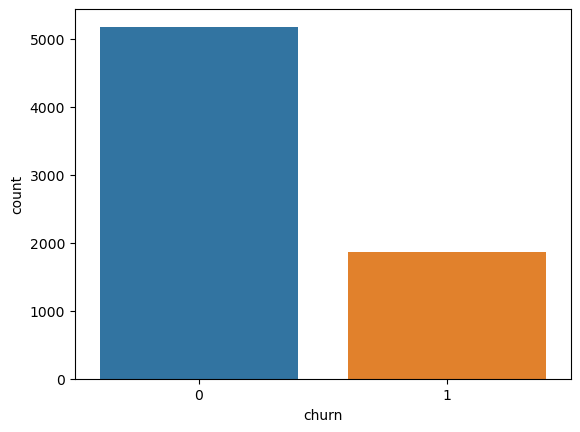

In [17]:
# Visualize the churn distribution using a count plot

df['churn'] = df['churn'].astype(int)   # or .astype('category')
sns.countplot(x='churn', data=df)
plt.show()


This plot visually confirms the class imbalance, showing that the number of non-churning customers (0) is significantly higher than the number of churning customers (1).

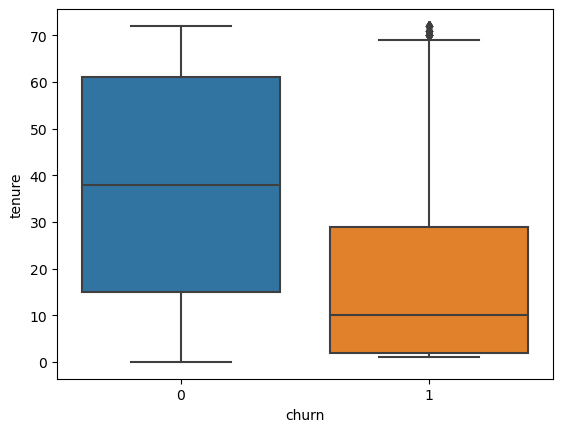

In [18]:
# Create a box plot to visualize the relationship between 'tenure' and 'churn'.
sns.boxplot(x='churn', y='tenure', data=df)
plt.show()

The plot clearly shows that customers who churn (1) have a significantly lower median tenure than customers who do not churn (0).
This suggests that tenure is a powerful predictor of customer churn.

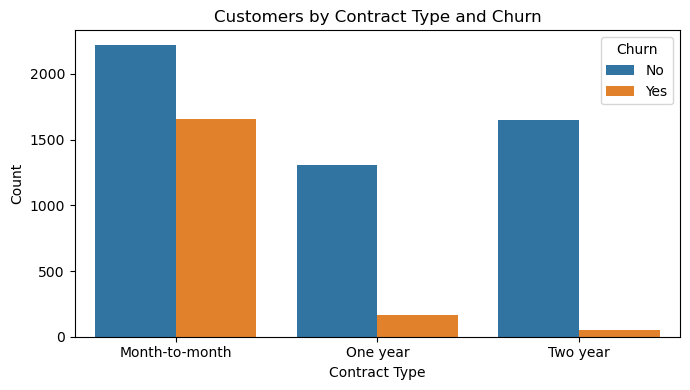

In [20]:
# Create a new categorical column for plotting purposes:
# original 'churn' column as numeric (0s and 1s)is kept for machine learning, 
# but create a new 'churn_label' column with clear strings ('No', 'Yes') for better visualization and a more readable legend.

if df['churn'].dtype != 'O':
    df['churn_label'] = df['churn'].map({0: 'No', 1: 'Yes'}).astype('category')
else:
    df['churn_label'] = df['churn'].str.strip().map({'No':'No','Yes':'Yes'}).astype('category')

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
sns.countplot(x='contract', hue='churn_label', data=df)
plt.title('Customers by Contract Type and Churn')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


The plot clearly shows that customer contract type is a powerful
predictor of churn. Month-to-month contracts have a significantly higher
churn count compared to one-year and two-year contracts, which have very low churn.
This confirms that longer-term contracts are a strong factor in retaining customers.

## Modeling
Objective: Prepare the final dataset and build a predictive machine learning model to estimate whether a customer will churn (Yes/No).

In [25]:

# Drop customerID (not useful for prediction)
df = df.drop(columns=['customerid'])

# Convert Yes/No columns to binary (0/1)
binary_map = {'Yes': 1, 'No': 0}
for col in df.columns:
    if df[col].nunique() == 2 and set(df[col].dropna().unique()).issubset({'Yes','No'}):
        df[col] = df[col].map(binary_map)

# One-hot encode multi-category columns 
# pd.get_dummies() creates new binary columns for each category.
df_encoded = pd.get_dummies(df, drop_first=True)    # drop_first=True : to prevent multicollinearity.

print("Original shape:", df.shape)
print("Encoded shape:", df_encoded.shape)
                              

Original shape: (7043, 21)
Encoded shape: (7043, 32)


In [34]:
# In Telco data, TotalCharges sometimes has blank values (for customers with 0 tenure). 
# When converted with pd.to_numeric(errors='coerce'), those blanks became NaN.
# Logistic Regression cannot train with NaN values, so we must either drop or fill them.
#  Drop any remaining rows with NaN values. 
df_encoded = df_encoded.dropna()


# Data Splitting
Objective: Split the data into training and testing sets to ensure our model can be evaluated on unseen data.

In [40]:
# Split features and target
# Import the necessary tool for splitting the data
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['churn', 'churn_label_1'], errors='ignore')
y = df_encoded['churn']


# Train/test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, " Test shape:", X_test.shape)

                                                    

Train shape: (5625, 30)  Test shape: (1407, 30)


# Model Training
Objective: Train a Logistic Regression model to predict churn.
Addressing a common convergence issue by scaling the features.

In [47]:
# Import the necessary scaler from scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()   # putting all features on a similar scale.
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


## Evaluate the Model
Objective: Assess the performance of the trained model using key metrics.

ROC-AUC: 0.8356727976766699
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



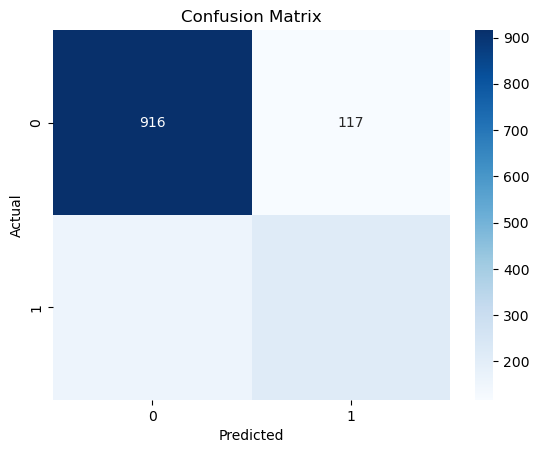

In [49]:

# Import the necessary evaluation metrics from scikit-learn
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Make predictions using scaled test data.
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:,1]

# Evaluate the model's performance on the test set.
# ROC-AUC measures the model's ability to distinguish between classes.
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

# The classification report provides precision, recall, and f1-score,
# which are essential for evaluating performance on an imbalanced dataset.
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix to see where the model is making errors.
# This plot shows the count of correct vs. incorrect predictions for each class.
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The final ROC-AUC score is 0.835: It means the model has an 83% chance of distinguishing between churners and non-churners.

Accuracy: 0.80 (80%)
Overall, the model correctly predicts churn vs. non-churn 80% of the time.

Confusion Matrix Interpretation:
True Negatives (916) → Customers who did not churn and were correctly predicted.
False Positives (117) → Customers predicted to churn, but they didn’t.
False Negatives (~160) → Customers who churned but were missed by the model.
True Positives (~214) → Customers who churned and were correctly predicted.

Precision (Churn = 1): 0.65
When the model predicts churn, it’s correct 65% of the time.

Recall (Churn = 1): 0.57
The model only catches 57% of actual churners. This means many churners are being missed (false negatives).

F1 Score (Churn = 1): 0.61
 Balances precision & recall. Still moderate, not excellent.

For non-churn (class 0): precision & recall are high (0.85+), which means the model is much better at predicting customers who stay.

Next steps:
Try different algorithms (Random Forest, XGBoost often do better than Logistic Regression on churn).
Tune thresholds (maybe lowering the cutoff from 0.5 to catch more churners).


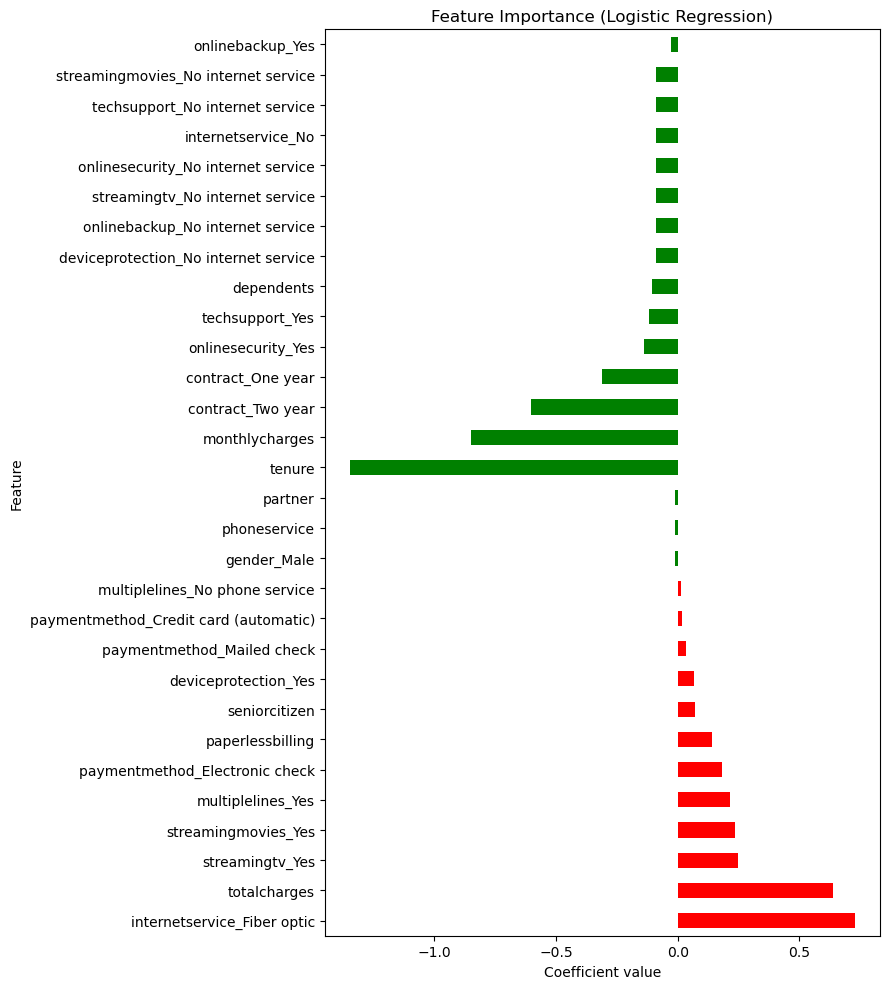

Top churn drivers:
 internetservice_Fiber optic              0.727745
totalcharges                             0.639028
streamingtv_Yes                          0.249702
streamingmovies_Yes                      0.236368
multiplelines_Yes                        0.214359
paymentmethod_Electronic check           0.181473
paperlessbilling                         0.142663
seniorcitizen                            0.070792
deviceprotection_Yes                     0.068965
paymentmethod_Mailed check               0.033392
paymentmethod_Credit card (automatic)    0.016632
multiplelines_No phone service           0.011882
gender_Male                             -0.011693
phoneservice                            -0.011882
partner                                 -0.012896
dtype: float64

Top retention drivers:
 tenure                                 -1.347613
monthlycharges                         -0.851551
contract_Two year                      -0.602591
contract_One year                      -0.3

In [51]:
# coefficients from the trained logistic regression
importance = pd.Series(model.coef_[0], index=X.columns)

# top 15 that INCREASE churn (red) + top 15 that REDUCE churn (green)
top_features = pd.concat([
    importance.sort_values(ascending=False).head(15),
    importance.sort_values(ascending=True).head(15)
])

colors = ['red' if v > 0 else 'green' for v in top_features]
top_features.plot(kind='barh', color=colors, figsize=(9,10))
plt.title("Feature Importance (Logistic Regression)")
plt.xlabel("Coefficient value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

print("Top churn drivers:\n", importance.sort_values(ascending=False).head(15))
print("\nTop retention drivers:\n", importance.sort_values(ascending=True).head(15))


Feature Importance Analysis

The bar chart above shows how different features influence customer churn:

Positive coefficients (red bars): Increase the likelihood of churn.

Example:

Customers with Fiber optic internet service have a much higher probability of churning compared to DSL users.

Higher total charges and Electronic check payments are also strong churn drivers.

Negative coefficients (green bars): Reduce the likelihood of churn (customers are more likely to stay).

Example:

Longer tenure significantly reduces churn (loyal customers tend to stay).

Having a One year or Two year contract lowers churn compared to month-to-month contracts.

Additional services like Tech support and Online security also improve retention.
